# Exercise: Cherry Blossoms!

#### Summary

Once upon a time it was サクラ season, which meant the [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! This year they bloomed a little early and they've long sinced faded, so for today we'll stick with data-driven blossoms: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Data Source(s)

Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City
(and March Mean Temperature Reconstructions), http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Files

- KyotoFullFlower7.xls, "Full-flowering Dates of Prunus jamasakura in Kyoto City"

#### Skills

- Working with Excel files
- Ignoring the first few rows
- Replacing NaN values
- Counting and summarizing columns
- Replacing non-NaN values
- Extracting with strings
- Rolling means

# Read in `KyotoFullFlower7.xls`

Be sure to look at the first five rows.

In [1]:
import pandas as pd
kyotofull = pd.read_excel('KyotoFullFlower7.xls')

In [2]:
kyotofull.head(30)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN
5,Column D; Source code,NaN,NaN,NaN,NaN,NaN
6,"1; Reported by Taguchi (1939), J. Marine Mete...",NaN,NaN,NaN,NaN,NaN
7,"2; Added by Sekiguchi (1969), Tokyo Geography...",NaN,NaN,NaN,NaN,NaN
8,"3; Added by Aono and Omoto (1994), J. Agric. ...",NaN,NaN,NaN,NaN,NaN
9,"4; Added by Aono and Kazui (2008), Int. J. Cl...",NaN,NaN,NaN,NaN,NaN


### That... doesn't look right. Why not? 

Examine your column names, and maybe even open up the file in Excel.

### Read in the file correctly, and look at the first five rows

- TIP: The first year should be 801 AD, and it should not have any dates or anything.

In [3]:
kyotofull = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)

In [4]:
kyotofull.head(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
5,806,NaN,NaN,NaN,NaN,-
6,807,NaN,NaN,NaN,NaN,-
7,808,NaN,NaN,NaN,NaN,-
8,809,NaN,NaN,NaN,NaN,-
9,810,NaN,NaN,NaN,NaN,-


### Look at the final five rows of the data

In [5]:
kyotofull.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## Watching out for NaN values

Take a look at **Reference name**. Is there something you should set to be `NaN`? Use either of the two ways we have covered.

In [6]:
import numpy as np

In [7]:
kyotofull['Reference Name'].replace('-', np.nan, inplace=True)

In [8]:
kyotofull.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


### Check that you have 827 values for "Full-flowering date (DOY)" and 825 for "Reference Name"

In [9]:
kyotofull['Full-flowering date (DOY)'].value_counts().sum()

827

In [10]:
kyotofull['Reference Name'].value_counts().sum()

825

# Cleaning up our data

## What sources are the most common as a reference?

In [11]:
kyotofull['Reference Name'].value_counts().head(10)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
DAIGOJI-ZATSUYO               21
OYUDONONO-UENO-NIKKI [EDA]    21
SANETAKA-KOKI                 19
NIHONKIRYAKU                  19
(SHIRYO-SORAN)                15
KAKUMEIKI                     15
Name: Reference Name, dtype: int64

## Filter the list to only include rows that have a `Full-flowering date (DOY)`

In [12]:
kyotofull_withdates = kyotofull[kyotofull['Full-flowering date (DOY)'].notnull()]

In [13]:
kyotofull_withdates.head(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## Make a histogram of the full-flowering date.

In [14]:
%matplotlib inline

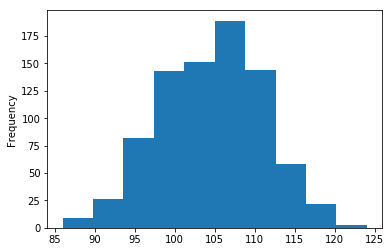

In [15]:
kyotofull_withdates['Full-flowering date (DOY)'].plot(kind='hist')

## Make another histogram of the full-flowering date, but with 39 bins instead of 10

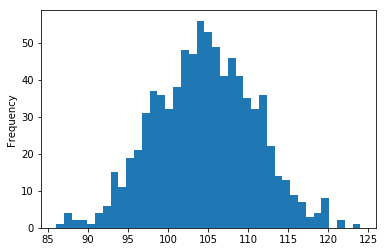

In [16]:
kyotofull_withdates['Full-flowering date (DOY)'].plot(kind='hist', bins=39)

## What's the average number of days it takes for the flowers to blossom? The max? Min? And how many records do we have?

Answer these with one line of code.

In [17]:
pd.options.display.float_format = '{:,.0f}'.format

In [18]:
kyotofull_withdates['Full-flowering date (DOY)'].describe()

count   827
mean    105
std       6
min      86
25%     100
50%     105
75%     109
max     124
Name: Full-flowering date (DOY), dtype: float64

## What's the average number of days into the year cherry flowers normally blossomed before 1900?

In [19]:
before_1900 = kyotofull_withdates[kyotofull_withdates.AD <= 1900]

In [20]:
before_1900['Full-flowering date (DOY)'].mean()

105.2027972027972

## How about after 1900?

In [21]:
after_1900 = kyotofull_withdates[kyotofull_withdates.AD > 1900]

In [22]:
after_1900['Full-flowering date (DOY)'].mean()

100.3125

## How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [23]:
kyotofull_withdates[kyotofull_withdates['Data type code'] == 4].shape

(39, 6)

## Actually, that looks terrible. Replace the "Source code" and "data type code" columns with the values they stand for.

In [24]:
data_type_code = pd.read_csv('KyotoFullFlower7-DataTypeCode.txt')

In [25]:
data_type_code.head(6)

,Data type code,Data Type
0,0,data from modern times (full-bloom date since ...
1,1,from diary description about full-bloom
2,2,from diary description about cherry blossom vi...
3,3,from diary description about presents of cherr...
4,4,title in Japanese poety
5,8,"Deduced from wisteria phenology, using the rel..."


In [26]:
kyotofull_withtypes = kyotofull_withdates.merge(data_type_code, left_on='Data type code', right_on='Data type code')

In [27]:
kyotofull_withtypes.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Data Type
0,812,92,401,1,2,NIHON-KOKI,from diary description about cherry blossom vi...
1,815,105,415,1,2,NIHON-KOKI,from diary description about cherry blossom vi...
2,831,96,406,1,2,NIHON-KOKI,from diary description about cherry blossom vi...
3,851,108,418,1,2,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom vi...
4,853,104,414,1,2,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom vi...


## Show only the years where our data was from a title in Japanese poetry

In [28]:
kyotofull_withtypes[kyotofull_withtypes['Data Type'].str.lower().str.contains('poety')]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Data Type
454,891,109,419,5,4,NIHONKIRYAKU,title in Japanese poety
455,895,104,414,5,4,NIHONKIRYAKU,title in Japanese poety
456,896,104,413,5,4,NIPPON-SANDAI-JITSUROKU,title in Japanese poety
457,923,104,414,5,4,ZOKU-KOKIN-WAKASHU,title in Japanese poety
458,955,89,330,5,4,SHUISHO,title in Japanese poety
459,969,98,408,5,4,NIHONKIRYAKU,title in Japanese poety
460,1007,106,416,5,4,MIDO-KAMPAKUKI,title in Japanese poety
461,1033,102,412,5,4,NIHONKIRYAKU,title in Japanese poety
462,1036,104,413,5,4,NIHONKIRYAKU,title in Japanese poety
463,1060,108,417,5,4,SHIN-SENZAI-WAKASHU,title in Japanese poety


## Graph the full-flowering date (DOY) over time

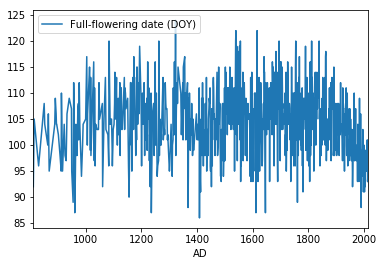

In [29]:
kyotofull_withdates.plot(kind='line', x='AD', y='Full-flowering date (DOY)')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [30]:
kyotofull_withdates.rolling(10, on='AD', min_periods=5).mean().tail()
# If this gives you an error you're using an old pandas version,
# so you can use df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()
# instead

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,96,406,5,0,NEWS-PAPER(ARASHIYAMA)
1211,2012,97,407,6,0,NEWS-PAPER(ARASHIYAMA)
1212,2013,96,406,6,0,NEWS-PAPER(ARASHIYAMA)
1213,2014,97,406,6,0,NEWS-PAPER(ARASHIYAMA)
1214,2015,96,406,7,0,NEWS-PAPER(ARASHIYAMA)


Adjust the code above to compute **and graph** a 20-year rolling average for the entire dataset.

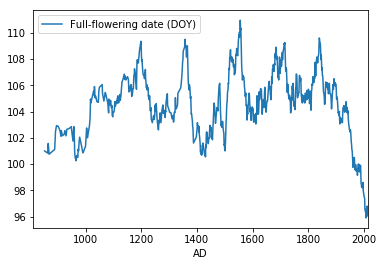

In [31]:
kyotofull_withdates.rolling(20, on='AD', min_periods=5).mean().plot(kind='line', x='AD', y='Full-flowering date (DOY)')

# Adding a month column

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

### Actually adding our column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

In [32]:
# Doing a value_counts to see how many substitutions we'll need to do, how many months
# there are on Full-flowering date. Turns out we only have March, April, May
kyotofull_withdates['Full-flowering date'].value_counts()

415    55
412    53
413    50
414    47
418    47
416    46
417    45
407    39
411    39
420    39
422    36
409    35
419    35
408    34
410    34
421    27
406    21
423    21
405    17
403    15
404    15
424    13
426    12
425     9
401     8
429     7
427     6
430     5
402     3
328     3
330     3
327     3
501     2
504     1
428     1
329     1
Name: Full-flowering date, dtype: int64

In [33]:
# We could do it 3 times like above, but it's boring
# kyotofull_withdates.loc[kyotofull_withdates['Full-flowering date'].astype(str).str.contains('^3'), 'month'] = 'March'

In [34]:
# So we will create a function to do it for us

# First of all we create a new, empty month column
kyotofull_withdates['month'] = ''

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
# And then we will create the function that will add values to our month column
# according to what the Full-flowering date starts with
# Kudos to Georgia Kromreig and Elisa Harlan for assistance
def create_month(row):
    if str(row['Full-flowering date']).startswith('3'):
        return 'March'
    if str(row['Full-flowering date']).startswith('4'):
        return 'April'   
    if str(row['Full-flowering date']).startswith('5'):
        return 'May'
    
kyotofull_withdates['month'] = kyotofull_withdates.apply(create_month, axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [36]:
kyotofull_withdates.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92,401,1,2,NIHON-KOKI,April
14,815,105,415,1,2,NIHON-KOKI,April
30,831,96,406,1,2,NIHON-KOKI,April
50,851,108,418,1,2,MONTOKUTENNO-JITSUROKU,April
52,853,104,414,1,2,MONTOKUTENNO-JITSUROKU,April


### Using your new column, how many blossomings happened in each month?

In [37]:
kyotofull_withdates.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### Graph how many blossomings happened in each month.

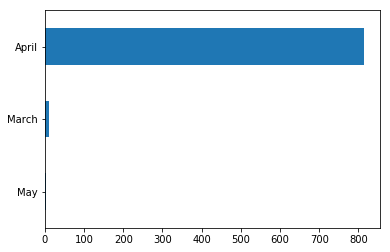

In [38]:
kyotofull_withdates.month.value_counts(ascending=True).plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called **day-of-month** based on the full-flowering date.

- 402 means "April 2"
- 312 means "March 12"
- 511 means "May 11"

**We're only interested in the second part**. Previously I've had students convert them to integers to do this, but you know regular expressions!

- Tip: You won't be able to extract anything from a float, you'll need it to be a string
- Tip: There are two things that mean "talk about this column as a string," maybe you want me to talk about them?

In [39]:
kyotofull_withdates['Full-flowering date'] = kyotofull_withdates['Full-flowering date'].astype(str)
kyotofull_withdates.dtypes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


AD                             int64
Full-flowering date (DOY)    float64
Full-flowering date           object
Source code                  float64
Data type code               float64
Reference Name                object
month                         object
dtype: object

In [40]:
kyotofull_withdates['Full-flowering date'].str.extract('^\d(\d{2})').value_counts().head(5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


15    55
12    53
13    50
18    47
14    47
Name: Full-flowering date, dtype: int64

In [41]:
kyotofull_withdates['day-of-month'] = ''

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
# Regex doesn't seem to work with startswith, endswith, so I used string splitting in order to extract the days

def create_day_of_month(row):
    #endings = (r'[15]')
    for i in range(0,10):
        # For 301-330, month March
        # Avoiding weird string splitting for days that end with 3
        if str(row['Full-flowering date']).startswith('3') & str(row['Full-flowering date']).endswith('3.0'):
            string = str(row['Full-flowering date']).split('.')[0]
            return string[1]+string[2]
        # Avoiding weird string splitting for days that end with 0
        if str(row['Full-flowering date']).startswith('3') & str(row['Full-flowering date']).endswith('0.0'):
            string = str(row['Full-flowering date']).split('.')[0]
            return string[1]+string[2]
        # All other cases
        if str(row['Full-flowering date']).startswith('3') & str(row['Full-flowering date']).endswith(str(i)+'.0'):
            return str(row['Full-flowering date']).split('3')[1].split('.')[0]
        
        # For 401 - 430, month April
        # Avoiding weird string splitting for days that end with 4
        if str(row['Full-flowering date']).startswith('4') & str(row['Full-flowering date']).endswith('4.0'):
            string = str(row['Full-flowering date']).split('.')[0]
            return string[1]+string[2]
        # All other cases
        if str(row['Full-flowering date']).startswith('4') & str(row['Full-flowering date']).endswith(str(i)+'.0'):
            return str(row['Full-flowering date']).split('4')[1].split('.')[0]
        
        # For 501-530, month May
        # Avoiding weird string splitting for days that end with 5
        if str(row['Full-flowering date']).startswith('5') & str(row['Full-flowering date']).endswith('5.0'):
            string = str(row['Full-flowering date']).split('.')[0]
            return string[1]+string[2]
        # All other cases
        if str(row['Full-flowering date']).startswith('5') & str(row['Full-flowering date']).endswith(str(i)+'.0'):
            return str(row['Full-flowering date']).split('5')[1].split('.')[0]
        
kyotofull_withdates['day-of-month'] = kyotofull_withdates.apply(create_day_of_month, axis=1)       

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [43]:
kyotofull_withdates.head(15)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-month
11,812,92,401.0,1,2,NIHON-KOKI,April,01
14,815,105,415.0,1,2,NIHON-KOKI,April,15
30,831,96,406.0,1,2,NIHON-KOKI,April,06
50,851,108,418.0,1,2,MONTOKUTENNO-JITSUROKU,April,18
52,853,104,414.0,1,2,MONTOKUTENNO-JITSUROKU,April,14
63,864,100,409.0,1,2,NIPPON-SANDAI-JITSUROKU,April,09
65,866,106,416.0,1,2,NIPPON-SANDAI-JITSUROKU,April,16
68,869,95,405.0,5,2,KANKE-BUNSOU,April,05
88,889,104,414.0,5,2,NIPPON-SANDAI-JITSUROKU,April,14
90,891,109,419.0,5,4,NIHONKIRYAKU,April,19


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`. If should look like "April 09".

In [44]:
kyotofull_withdates['date'] = kyotofull_withdates['month'] + ' ' + kyotofull_withdates['day-of-month']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
kyotofull_withdates.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-month,date
11,812,92,401.0,1,2,NIHON-KOKI,April,01,April 01
14,815,105,415.0,1,2,NIHON-KOKI,April,15,April 15
30,831,96,406.0,1,2,NIHON-KOKI,April,06,April 06
50,851,108,418.0,1,2,MONTOKUTENNO-JITSUROKU,April,18,April 18
52,853,104,414.0,1,2,MONTOKUTENNO-JITSUROKU,April,14,April 14
